In [417]:
import sklearn

In [418]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

#Create samples

X,y = make_circles(n_samples, noise=0.03, random_state = 42)

In [419]:
len(X), len(y)

(1000, 1000)

In [420]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [421]:
X.dtype

dtype('float64')

In [422]:
# Make Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


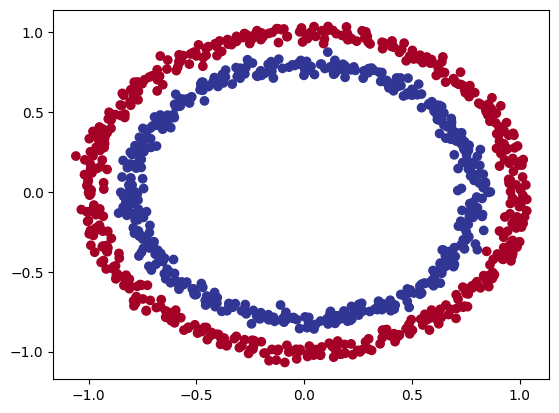

In [423]:
# Visualize, Visualize, Visualize

import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

##### Note: The data you are working with is often referred to as toy dataset, a dataset that is small enough to experiment on but still sizeable enough to practice the fundamentals


### 1.1 Check input and output shapes

In [424]:
type(X)

numpy.ndarray

In [425]:
X.shape, y.shape

((1000, 2), (1000,))

In [426]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [427]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f" Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")  # y is a scalar which doesnot have shape


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
 Shapes for one sample of X: (2,) and the same for y: ()


In [428]:
## Turn data into tensors and create train and test splits
import torch
torch.__version__

'2.4.1'

In [429]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [430]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)
type(X)


torch.Tensor

In [431]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [432]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [433]:
X_test[:4], y_test[:4]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664]]),
 tensor([1., 0., 1., 0.]))

## 2. Building a model 

let's build a model to classify our red and blue dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator(GPU), if there is one
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Build a training and testing loop


In [434]:
# Import PyTorch and nn
import torch 
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Now we have setup device agnostic code , let's create a model that :

1. Subclassing 'nn.Module' (almost all models in PyTorch subclass 'nn>Module')
2. Create two nn.Linear layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass(or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device


In [435]:
input_feature_size = X.shape[1]
input_feature_size

2

In [436]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create two nn.Linear layers capable of handling the shapes of our data
        self.linear_layer1 = nn.Linear(in_features = input_feature_size, out_features = 5) # Takes in 2 features and ouputs 10 features
        self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)  # Takes in 10 features and outputs 1 feature
    # Define a forward() method that outlines the forward pass
    def forward(self,x):
        x= self.linear_layer1(x)
        x= self.linear_layer2(x)
        return x 
            

In [437]:
# Instantiate an instance of our model class and send it to the target device 
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (linear_layer1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [438]:
device

'cpu'

In [439]:
next(model_0.parameters()).device

device(type='cpu')

In [440]:
#Let's replicate the above model using nn.sequential

# model_0 = nn.Sequential(
#     nn.Linear(in_features=input_feature_size, out_features=5),
#     nn.Linear(in_features=5, out_features=1)
# ).to(device)

# model_0

In [441]:
# # 1. Construct a model that subclasses nn.Module using nn.Sequential
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # Create two nn.Linear layers capable of handling the shapes of our data
#         # self.linear_layer1 = nn.Linear(in_features = input_feature_size, out_features = 5) # Takes in 2 features and ouputs 10 features
#         # self.linear_layer2 = nn.Linear(in_features = 5, out_features = 1)  # Takes in 10 features and outputs 1 feature
#         self.two_linear_layer = nn.Sequential(
#             nn.Linear(in_features= input_feature_size, out_features= 5),
#             nn.Linear(in_features=5 , out_features= 1)
#         )
#     # Define a forward() method that outlines the forward pass
#     def forward(self,x):
#         x = self.two_linear_layer(x)
#         return x 
    
# # Instantiate an instance of our model class and send it to the target device 
# model_0 = CircleModelV0().to(device)
# model_0

In [442]:
next(model_0.parameters())  # Donot know the difference between parameters and state_dict()

Parameter containing:
tensor([[ 0.5406,  0.5869],
        [-0.1657,  0.6496],
        [-0.1549,  0.1427],
        [-0.3443,  0.4153],
        [ 0.6233, -0.5188]], requires_grad=True)

In [443]:
model_0.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]])),
             ('linear_layer1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410])),
             ('linear_layer2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]])),
             ('linear_layer2.bias', tensor([-0.2060]))])

In [444]:
X_test[:4]

tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664]])

In [445]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
    print(f" Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
    print(f" Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
    print(f"\nFirst 10 predictions: {torch.round(untrained_preds[:10])}")
    print(f"\nFirst 10 labels: {y_test[:10]}")

 Length of predictions: 200, Shape: torch.Size([200, 1])
 Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions: tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss functions and optimizer

which loss functions or optimizer to use?
Again.. this is problem specific
for example for regression you might want MAE or MSE 
For classification you might want binary cross entropy or categorical cross entropy

As a reminder, the loss function measures how *wrong* your models predictions are.

And for optimizer, two of the most common and useful are SGD and ADAM, however PyTorch has many built-in options


In [446]:
### Setup loss functions and optimizer
#loss_fn = nn.BCEloss()  # BCEloss = requires input to have gone through the sigmoid activation function prior to input BCE loss
loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built-in
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [447]:
# calculate the accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


## 3. Train Model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels
our model outputs are going to be raw ***logits*** 
we canm convert these ***logits*** into ***prediction probabilities*** by passing them to some kind of activation finctions (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to ***prediction labels*** by either rounding them or taking the 'argmax()'. Round is for binary classification and argmax is for softmax activation function

In [448]:
# view the first five outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]])

In [449]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]])

For our prediction probability values, we need to perform a range style rounding on them:
* 'y_pred_probs' >= 0/5, 'y=1' (class 1)
* 'y_pred_probs' < 0.5,  'y=0' (class 0)

In [450]:
y_preds = torch.round(y_pred_probs)

In [451]:
# Find the predicted probabilties 
# In full (logits -> pred_probs -> pred_labels)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

y_pred_labels

# check for equality
print(torch.eq(y_preds.squeeze() , y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### 3.2 Building a training loop and testing loop

In [452]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs =100

# set the data agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


# set the traing and testing loop
for epoch in range(epochs):
    # Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_logits))  #-> turn logits -> pred probs -> pred labels

    # 2. Calculate loss/accuracy
    # loss_fn1 = nn.BCELoss()
    # train_loss = loss_fn1(torch.sigmoid(y_logits), y_test) # nn.BCELoss expects prediction probabilities as input

    train_loss = loss_fn(y_logits, y_train)   # nn.BCEWithLogitLoss expects raw logits as input
    train_acc = accuracy_fn(y_true= y_train,
                      y_pred= y_train_pred )
    
    # 3, Zero the optimizer
    optimizer.zero_grad()

    # 4. Backpropogation
    train_loss.backward()

    # 5. Optmizer step... perform Gradient descent... Updates the parameters
    optimizer.step()

    ### Testing 
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/ accuracy
        test_loss = loss_fn(test_logits, y_test )
        test_acc = accuracy_fn(y_true = y_test,
                               y_pred= test_pred)

    # print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {train_loss:.5f} | Training_Accuracy: {train_acc: .2f}% | Test Loss: {test_loss:.5f} | Test_Accuracy: {test_acc: .2f}% ")    


Epoch: 0 | Training Loss: 0.69569 | Training_Accuracy:  50.00% | Test Loss: 0.69721 | Test_Accuracy:  50.00% 
Epoch: 10 | Training Loss: 0.69403 | Training_Accuracy:  50.00% | Test Loss: 0.69615 | Test_Accuracy:  50.00% 
Epoch: 20 | Training Loss: 0.69343 | Training_Accuracy:  46.00% | Test Loss: 0.69585 | Test_Accuracy:  48.50% 
Epoch: 30 | Training Loss: 0.69321 | Training_Accuracy:  49.00% | Test Loss: 0.69577 | Test_Accuracy:  47.50% 
Epoch: 40 | Training Loss: 0.69312 | Training_Accuracy:  49.50% | Test Loss: 0.69573 | Test_Accuracy:  46.50% 
Epoch: 50 | Training Loss: 0.69308 | Training_Accuracy:  50.38% | Test Loss: 0.69569 | Test_Accuracy:  46.50% 
Epoch: 60 | Training Loss: 0.69306 | Training_Accuracy:  50.50% | Test Loss: 0.69564 | Test_Accuracy:  46.50% 
Epoch: 70 | Training Loss: 0.69305 | Training_Accuracy:  50.50% | Test Loss: 0.69559 | Test_Accuracy:  46.50% 
Epoch: 80 | Training Loss: 0.69304 | Training_Accuracy:  50.75% | Test Loss: 0.69553 | Test_Accuracy:  46.50% 
Ep

## 4. Make predictions and evaluate the model 
From the metrics it looks like our model isn't learning anything....
So to inspect it let's make some predictions and make them visual!
In other words, "Visualize" , "Visualize" , "Visualize!"
To do so, we are going to import a function called "plot_decision_boundary()"

In [453]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else: 
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


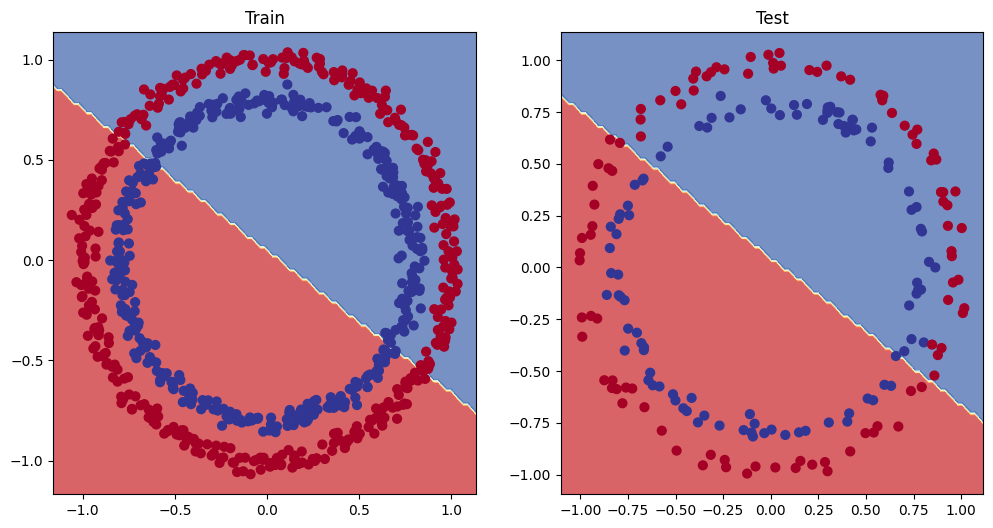

In [454]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden neurons= go from 5 hidden units to 10 hidden units
* Fit for longer epochs
* changing the activation functions
* changing the learning rate
* changing the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we can change, they are *hyperparameters*



### 6. The missing piece: Non-Linearity
" what patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?



### 6.1 Recreating non-linear data (red and blue circles)

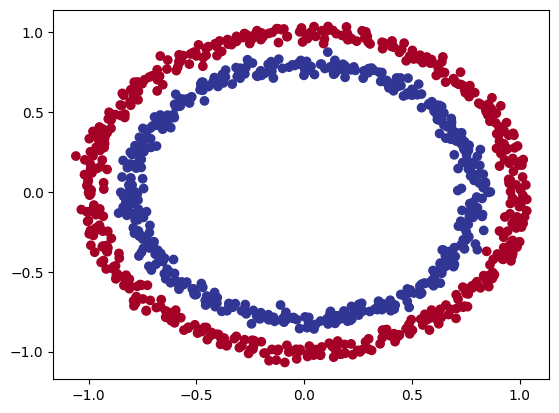

In [455]:

# make and plot data again just for completeness

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap = plt.cm.RdYlBu)


In [456]:
# Convert data to tensors and then to train and test splits
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

# split the data into training and testings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device) 

### 6.2 Building a model with non-linearity
* Linear = Straight Linear
* Non-Linear = Non-Straight Lines
 Artificial Neural Networks are a large combination of linear (straight) and non-straight(non-linear) functions which are potentially able to find patterns in data

In [457]:
# Build a model with non-linear activation functions 
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 2, out_features=10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 20)
        self.layer_3 = nn.Linear(in_features= 20, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linear activation function
    def forward(self, x):
        # Where should we put our non-linear activation function?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
    


In [458]:
model_5= CircleModelV2().to(device)
model_5

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)

In [459]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_5.parameters(),
                            lr = 0.1)


In [460]:
# Spam or Not spam
# Credit cards fraud or not fraud
# Insurance claims at fault or not at fault


### 6.3 Training a model with non-linearity

In [461]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device

X_train , y_train = X_train.to(device) , y_train.to(device) 
X_test, y_test = X_test.to(device), y_test.to(device) 

# Loop through data
epochs = 1500
train_loss_scores = []
epoch_scores = []
test_loss_scores = []
for epoch in range(epochs):
    model_5.train()
    # 1. Forward pass 
    y_logits = model_5(X_train).squeeze()
    y_train_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate the loss
    train_loss = loss_fn(y_logits, y_train)
    train_acc = accuracy_fn(y_true=y_train , 
                            y_pred=y_train_pred) 
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward propogation
    train_loss.backward()

    # 5. update the parameters with Gradient Descent
    optimizer.step() 

    # Testing loop 
    model_5.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_5(X_test).squeeze()
        y_test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. test Loss and Acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, 
                               y_pred= y_test_pred)

    if epoch % 10 ==0:
        train_loss_scores.append(train_loss)
        test_loss_scores.append(test_loss)
        epoch_scores.append(epoch)

        print(f"Epoch: {epoch} | Training_loss: {train_loss}|Training acc: {train_acc}% | Testing_loss: {test_loss} | Testing_acc: {test_acc}%")

Epoch: 0 | Training_loss: 0.6926181316375732|Training acc: 57.25% | Testing_loss: 0.6925286650657654 | Testing_acc: 56.49999999999999%
Epoch: 10 | Training_loss: 0.6922900676727295|Training acc: 53.625% | Testing_loss: 0.6921853423118591 | Testing_acc: 53.5%
Epoch: 20 | Training_loss: 0.6920152306556702|Training acc: 52.87500000000001% | Testing_loss: 0.691895604133606 | Testing_acc: 53.0%
Epoch: 30 | Training_loss: 0.6917785406112671|Training acc: 51.87500000000001% | Testing_loss: 0.6916372776031494 | Testing_acc: 52.5%
Epoch: 40 | Training_loss: 0.691560685634613|Training acc: 51.5% | Testing_loss: 0.6914027333259583 | Testing_acc: 53.5%
Epoch: 50 | Training_loss: 0.6913490891456604|Training acc: 51.5% | Testing_loss: 0.6911765933036804 | Testing_acc: 54.0%
Epoch: 60 | Training_loss: 0.691143274307251|Training acc: 50.74999999999999% | Testing_loss: 0.6909546852111816 | Testing_acc: 53.0%
Epoch: 70 | Training_loss: 0.6909394264221191|Training acc: 51.625% | Testing_loss: 0.690734624

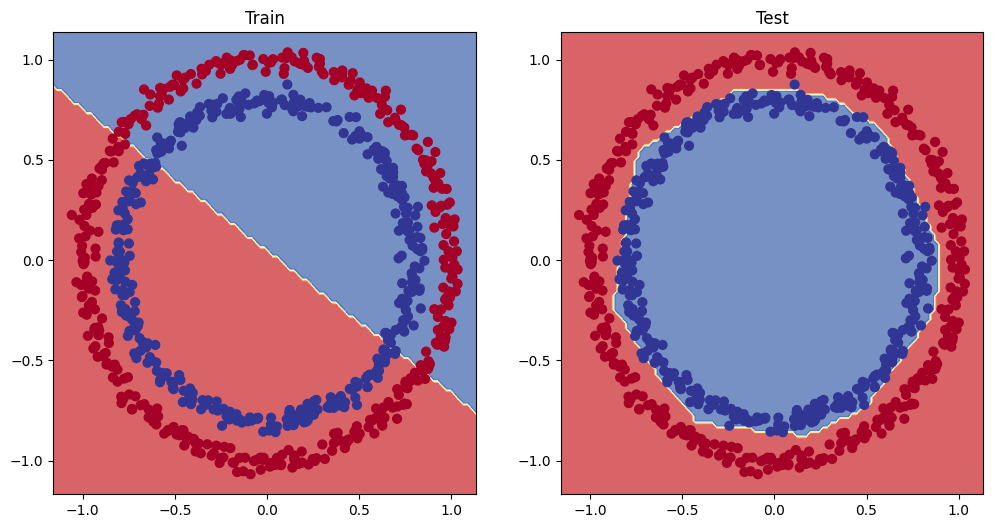

In [462]:
# Plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_train, y_train)

In [463]:
train_loss_scores

[tensor(0.6926, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6923, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6920, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6918, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6916, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6913, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6911, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6909, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6907, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6905, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6903, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6901, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6899, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6897, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.6895, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 tensor(0.

In [464]:
epoch_scores

[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 400,
 410,
 420,
 430,
 440,
 450,
 460,
 470,
 480,
 490,
 500,
 510,
 520,
 530,
 540,
 550,
 560,
 570,
 580,
 590,
 600,
 610,
 620,
 630,
 640,
 650,
 660,
 670,
 680,
 690,
 700,
 710,
 720,
 730,
 740,
 750,
 760,
 770,
 780,
 790,
 800,
 810,
 820,
 830,
 840,
 850,
 860,
 870,
 880,
 890,
 900,
 910,
 920,
 930,
 940,
 950,
 960,
 970,
 980,
 990,
 1000,
 1010,
 1020,
 1030,
 1040,
 1050,
 1060,
 1070,
 1080,
 1090,
 1100,
 1110,
 1120,
 1130,
 1140,
 1150,
 1160,
 1170,
 1180,
 1190,
 1200,
 1210,
 1220,
 1230,
 1240,
 1250,
 1260,
 1270,
 1280,
 1290,
 1300,
 1310,
 1320,
 1330,
 1340,
 1350,
 1360,
 1370,
 1380,
 1390,
 1400,
 1410,
 1420,
 1430,
 1440,
 1450,
 1460,
 1470,
 1480,
 1490]

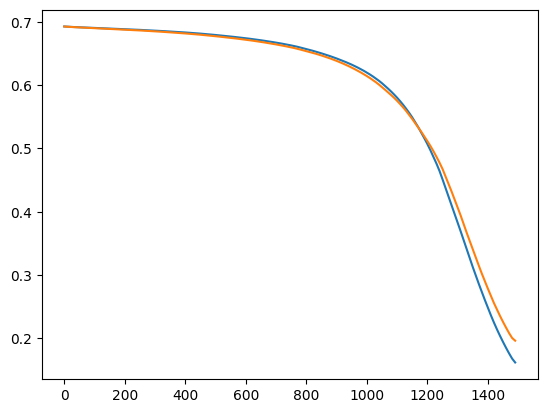

In [465]:
plt.plot( epoch_scores, torch.tensor(train_loss_scores))
plt.plot( epoch_scores, torch.tensor(test_loss_scores))

## 7. Replicating non-linear activation functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover the patterns in the data and it tries to figure out the patterns on its own

And these tools are linear and non-linear functions


In [466]:
# Create a Tensor 

A = torch.arange(-10,10,1, dtype = torch.float32)
A.dtype

torch.float32

In [467]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

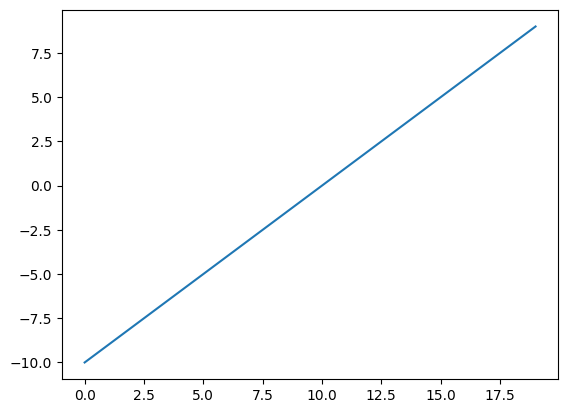

In [468]:
# Visualize the data 
plt.plot(A)

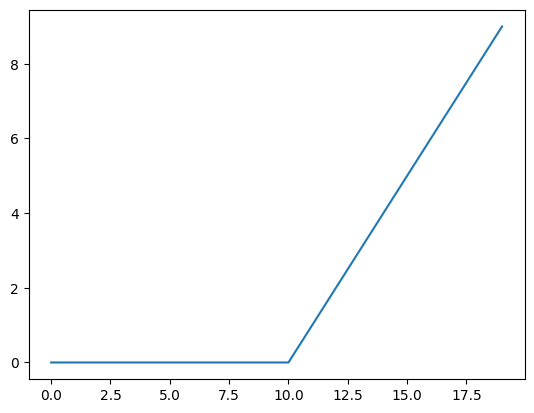

In [469]:
plt.plot(torch.relu(A))

In [470]:
def relu(x : torch.Tensor) -> torch.Tensor:
    return torch.max(torch.tensor(0), x) # -> Input must be tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [471]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
    return 1/ (1+ torch.exp(x))

In [472]:
sigmoid(A)

tensor([9.9995e-01, 9.9988e-01, 9.9966e-01, 9.9909e-01, 9.9753e-01, 9.9331e-01,
        9.8201e-01, 9.5257e-01, 8.8080e-01, 7.3106e-01, 5.0000e-01, 2.6894e-01,
        1.1920e-01, 4.7426e-02, 1.7986e-02, 6.6929e-03, 2.4726e-03, 9.1105e-04,
        3.3535e-04, 1.2339e-04])

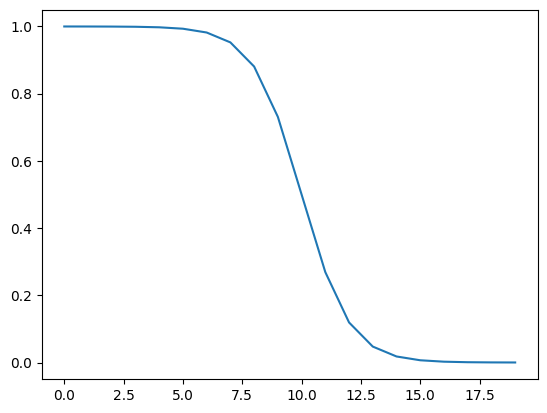

In [473]:
plt.plot(sigmoid(A))

### 8. Putting it all together with a multi-class classification problem
* Binary Classification = One thing or another (cat vs dog)
* Multi-class classification  =  More than one thing or another


### 8.1 Creating a toy multiclass dataset



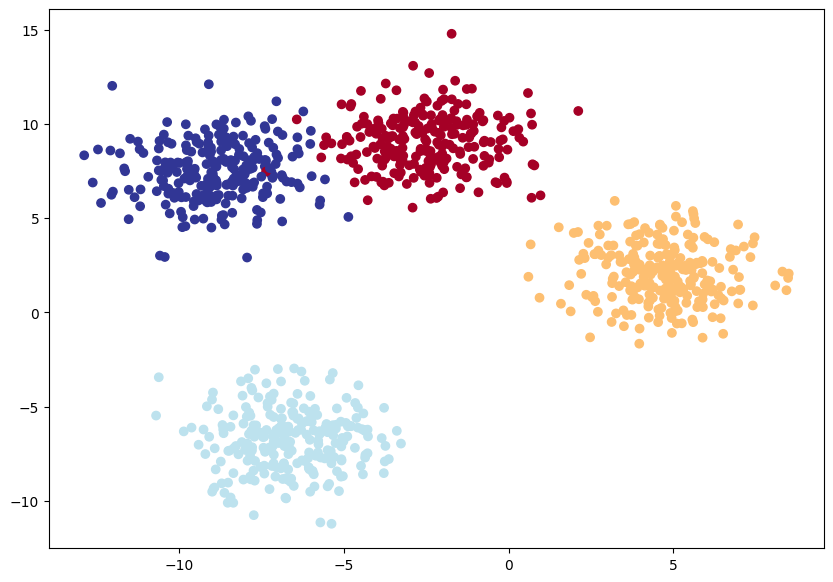

In [489]:
# Import Dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameter for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Create a multi-class data

X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the cluster a little shake up
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob  = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test , y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size= 0.2, random_state=RANDOM_SEED)

# 4. Plot data (Visualize, Visualize, Visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob , cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in pytorch


In [490]:
# create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [491]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """ Initializes multi-class classification model. 
         
          Args: 
           input_features (int): Number of input features to the model
            output_features (int): Number of outputs features (Number of output classes)
             hidden_units (int): Number of hidden units between layers, default:8
              
          Returns:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features= input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units , out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features= hidden_units, out_features = output_features)
        )
    def forward(self,x):
        return self.linear_layer_stack(x)
    
model_4 = BlobModel(input_features= 2, output_features=4, hidden_units=8).to(device)

In [492]:
X_blob_train.shape , y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [493]:
torch.unique(y_blob_train, return_counts = True)

(tensor([0, 1, 2, 3]), tensor([201, 209, 197, 193]))

### 8.3 set up the loss functiona and optimizer

In [494]:
# set up the loss functiona and optimizer for multi-class classification

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model_4.parameters(),
                             lr = 0.01)

### 8.4 Getting prediction Probabilities of our model (logits)

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels


 logits (Raw output from the model) -> prediction_probabilities (use torch.softmax, dim =1) -> prediction_labels (take the argmax of the prediction probabilities, dim =1)
 


In [495]:
next(model_4.parameters()).device

device(type='cpu')

In [496]:
X_test.device

device(type='cpu')

In [497]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    

y_logits[:5]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])

In [498]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [499]:
# converting logits into probabilities 

y_pred_probs = torch.softmax(y_logits , dim=1)
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])

In [500]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [501]:
torch,max(y_pred_probs[0])

(<module 'torch' from '/home/nikhil/anaconda3/envs/NORA/lib/python3.8/site-packages/torch/__init__.py'>,
 tensor(0.3244))

In [502]:
# Convert our model's predictions in to prediction labels

torch.argmax(y_pred_probs, dim =1)

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

### 8.5 Create a Training and testing loop for a multiclass PyTorch model


In [503]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()
    
    y_logits = model_4(X_blob_train)

    y_pred_labels = torch.softmax(y_logits, dim=1).argmax(dim=1)

    train_loss = loss_fn(y_logits, y_blob_train)
    train_acc = accuracy_fn(y_true= y_blob_train, 
                            y_pred= y_pred_labels)
    
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred_labels = torch.softmax(test_logits, dim =1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true= y_blob_test,
                               y_pred= test_pred_labels)
        
    # Print out what's happening
    if epoch% 10==0:
        print(f"Epoch: {epoch} | Training_loss: {train_loss}|Training acc: {train_acc}% | Testing_loss: {test_loss} | Testing_acc: {test_acc}%")

Epoch: 0 | Training_loss: 1.1588265895843506|Training acc: 40.375% | Testing_loss: 1.147240161895752 | Testing_acc: 38.5%
Epoch: 10 | Training_loss: 1.0649317502975464|Training acc: 55.375% | Testing_loss: 1.0684112310409546 | Testing_acc: 50.5%
Epoch: 20 | Training_loss: 0.9818969964981079|Training acc: 62.625% | Testing_loss: 0.9975585341453552 | Testing_acc: 57.49999999999999%
Epoch: 30 | Training_loss: 0.9113848805427551|Training acc: 70.5% | Testing_loss: 0.9360029697418213 | Testing_acc: 67.0%
Epoch: 40 | Training_loss: 0.8528527021408081|Training acc: 88.375% | Testing_loss: 0.8834068179130554 | Testing_acc: 87.5%
Epoch: 50 | Training_loss: 0.8042966723442078|Training acc: 92.125% | Testing_loss: 0.838513970375061 | Testing_acc: 93.0%
Epoch: 60 | Training_loss: 0.7635005712509155|Training acc: 93.625% | Testing_loss: 0.799843966960907 | Testing_acc: 94.5%
Epoch: 70 | Training_loss: 0.7284805178642273|Training acc: 94.875% | Testing_loss: 0.765947699546814 | Testing_acc: 95.0%
Ep

### 8.6 Making and evaluating predictions with a PyTorch multi-class model


In [507]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_pred_labels = torch.softmax(y_logits, dim=1).argmax(dim=1)
#view the first 10 predictions
y_logits[:10]
y_pred_labels[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

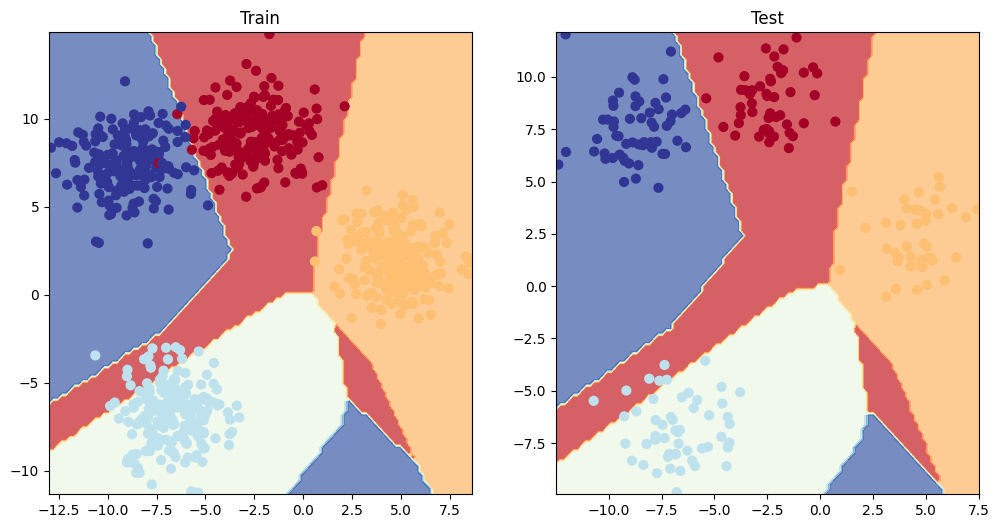

In [508]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 9. A few more classification metrics..... (to evaluate our classification model)

* Accuracy : Out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-Score
* Confusion matrix
* Classification Report
